# Alura Store Brasil

## Problema de negócio:
Você foi contratado como pessoa analista de dados para ajudar Sr. João a decidir **qual loja ele deve vender.**

O Sr. João tem uma rede de quatro lojas, que pertencem ao e-commerce Alura Store. Ele quer vender uma dessas lojas para ter um capital e investir em um novo negócio. 

Você, como pessoa analista de dados, vai **analisar qual dessas lojas tem o menor desempenho comparado às outras e, baseado nisso, fazer um relatório e mostrar para Sr.João qual loja ele deve vender.**

Para isso, você vai analisar as seguintes métricas: `faturamento total de cada loja`, `categorias mais populares`, `média de avaliação dos clientes`, `produtos mais e menos vendidos` e `custo médio do frete`. 

Com essas métricas, você será capaz de decidir qual loja Sr.João deve vender.

---

# Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento

## Análise inicial das colunas

Vamos verificar se as lojas possuem nomes de colunas diferentes e se possuem dados nulos.

In [2]:
loja.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

In [3]:
loja2.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

In [4]:
loja3.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

In [5]:
loja4.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon'],
      dtype='object')

#### As lojas possuem as colunas com mesmo nome.
---

In [6]:
loja.isnull().sum()

Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64

In [7]:
loja2.isnull().sum()

Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64

In [8]:
loja4.isnull().sum()

Produto                   0
Categoria do Produto      0
Preço                     0
Frete                     0
Data da Compra            0
Vendedor                  0
Local da compra           0
Avaliação da compra       0
Tipo de pagamento         0
Quantidade de parcelas    0
lat                       0
lon                       0
dtype: int64

#### Não há valores nulos nas lojas.
---

## Calculando o faturamento das lojas

In [9]:
faturamento_loja1 = loja.Preço.sum()
faturamento_loja2 = loja2.Preço.sum()
faturamento_loja3 = loja3.Preço.sum()
faturamento_loja4 = loja4.Preço.sum()

In [10]:
print(f'''FATURAMENTOS
        Loja 1: {faturamento_loja1},
        Loja 2: {faturamento_loja2},
        Loja 3: {faturamento_loja3},
        Loja 4: {faturamento_loja4}''')

FATURAMENTOS
        Loja 1: 1534509.12,
        Loja 2: 1488459.06,
        Loja 3: 1464025.03,
        Loja 4: 1384497.58


## Visualizando o faturamento com um gráfico de barras interativo

Vamos fazer a visualização com gráficos interativos, permitindo uma visualização mais viva e dinâmica dos dados

Nesse contexto de comparação de faturamento das lojas, vamos utilizar um gráfico de barras verticais, pois o mesmo facilita a visualização de quanto cada loja vendeu e permite uma comparação rápida com uma simples observação.

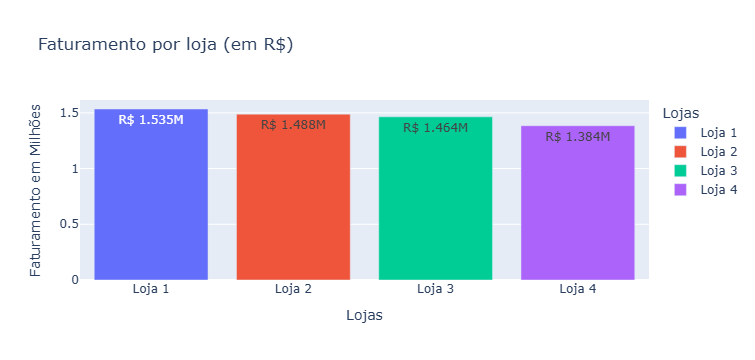

In [41]:
import plotly.express as px 

dados = pd.DataFrame(
        {'Lojas': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
        'Faturamento': [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]}
)

dados['Faturamento em Milhões'] = dados['Faturamento']/1000000

fig = px.bar(dados, x='Lojas',
             y='Faturamento em Milhões',
             title='Faturamento por loja (em R$)',
             color='Lojas',
             text='Faturamento em Milhões'
            )

fig.update_traces(
    texttemplate='R$ %{text:.3f}M'
)

fig.show()

# 2. Vendas por Categoria

## Calculando a quantidade de vendas de cada loja


In [12]:
loja['Categoria do Produto'].value_counts()

Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64

In [13]:
vendas_categoria_loja1 = loja['Categoria do Produto'].value_counts().sort_values(ascending=False).reset_index()
vendas_categoria_loja2 = loja2['Categoria do Produto'].value_counts().sort_values(ascending=False).reset_index()
vendas_categoria_loja3 = loja3['Categoria do Produto'].value_counts().sort_values(ascending=False).reset_index()
vendas_categoria_loja4 = loja4['Categoria do Produto'].value_counts().sort_values(ascending=False).reset_index()

In [14]:
vendas_categoria_loja1

,Categoria do Produto,count
0,moveis,465
1,eletronicos,448
2,brinquedos,324
3,eletrodomesticos,312
4,esporte e lazer,284
5,instrumentos musicais,182
6,livros,173
7,utilidades domesticas,171


## Renomeando o nome da coluna `count` para `Quantidade de vendas`

Ao usarmos o `value_counts` e salvar esses dados em variáveis, a coluna que apresenta os dados de quantidade de vendas passa a ser chamada de `count`.

Para uma melhor visualização do dataframe e identificação do que cada coluna representa, vamos renomear `count` para `Quantidade de vendas`

In [15]:
vendas_categoria_loja1.rename({'count': 'Quantidade de vendas'}, inplace=True, axis=1)
vendas_categoria_loja2.rename({'count': 'Quantidade de vendas'}, inplace=True, axis=1)
vendas_categoria_loja3.rename({'count': 'Quantidade de vendas'}, inplace=True, axis=1)
vendas_categoria_loja4.rename({'count': 'Quantidade de vendas'}, inplace=True, axis=1)

In [16]:
vendas_categoria_loja1

,Categoria do Produto,Quantidade de vendas
0,moveis,465
1,eletronicos,448
2,brinquedos,324
3,eletrodomesticos,312
4,esporte e lazer,284
5,instrumentos musicais,182
6,livros,173
7,utilidades domesticas,171


In [17]:
vendas_categoria_loja2

,Categoria do Produto,Quantidade de vendas
0,moveis,442
1,eletronicos,422
2,brinquedos,313
3,eletrodomesticos,305
4,esporte e lazer,275
5,instrumentos musicais,224
6,livros,197
7,utilidades domesticas,181


In [18]:
vendas_categoria_loja3

,Categoria do Produto,Quantidade de vendas
0,moveis,499
1,eletronicos,451
2,brinquedos,315
3,eletrodomesticos,278
4,esporte e lazer,277
5,livros,185
6,instrumentos musicais,177
7,utilidades domesticas,177


In [19]:
vendas_categoria_loja4

,Categoria do Produto,Quantidade de vendas
0,moveis,480
1,eletronicos,451
2,brinquedos,338
3,esporte e lazer,277
4,eletrodomesticos,254
5,utilidades domesticas,201
6,livros,187
7,instrumentos musicais,170


## Visualizando as vendas por categoria com gráficos interativos

### Vendas por categoria - Loja 1

In [20]:
fig = px.bar(vendas_categoria_loja1,
             x='Categoria do Produto',
             y='Quantidade de vendas',
             color='Categoria do Produto',
             title='Vendas por categoria de produto - Loja 1')

fig.update_layout(legend_title_text='')
fig.update_yaxes(title_text='Quantidade de Vendas')

fig.show()

### Vendas por cateogria - Loja 2

In [21]:
fig = px.bar(vendas_categoria_loja2,
             x='Categoria do Produto',
             y='Quantidade de vendas', 
             color='Categoria do Produto', 
             title='Vendas por categoria de produto - Loja 2')

fig.update_layout(legend_title_text='')
fig.update_yaxes(title_text='Quantidade de Vendas')

fig.show()

### Vendas por categoria - Loja 3

In [22]:
fig = px.bar(vendas_categoria_loja3,
             x='Categoria do Produto',
             y='Quantidade de vendas', 
             color='Categoria do Produto', 
             title='Vendas por categoria de produto - Loja 3')

fig.update_layout(legend_title_text='')
fig.update_yaxes(title_text='Quantidade de Vendas')

fig.show()

### Vendas por categoria - Loja 4

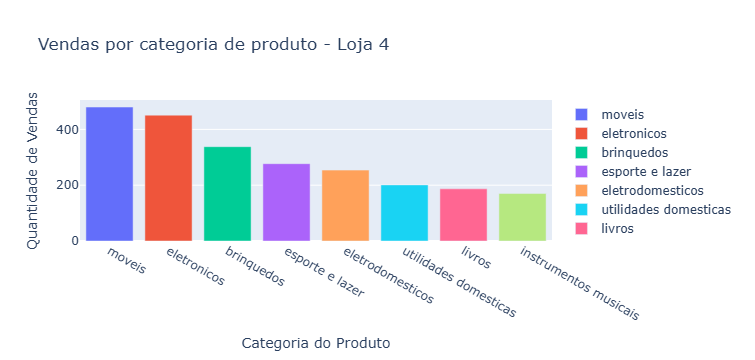

In [23]:
fig = px.bar(vendas_categoria_loja4,
             x='Categoria do Produto',
             y='Quantidade de vendas', 
             color='Categoria do Produto', 
             title='Vendas por categoria de produto - Loja 4')

fig.update_layout(legend_title_text='')
fig.update_yaxes(title_text='Quantidade de Vendas')

fig.show()

# 3. Média de Avaliação das Lojas


## Unificando as lojas em um único dataframe

Vamos agora unificar as lojas para um único dataframe, para então calcular a média específica para cada uma a partir de seu id.

Como as colunas possuem a mesma estrutura, a concatenação torna-se uma excelente opção para unificá-las a fim da realização da média de avaliação

### Criando uma coluna de ID's

In [26]:
loja['ID da Loja'] = 'Loja 01'
loja2['ID da Loja'] = 'Loja 02'
loja3['ID da Loja'] = 'Loja 03'
loja4['ID da Loja'] = 'Loja 04'

### Concatenando as colunas

In [27]:
lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True) 
lojas

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,ID da Loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 01
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 01
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 01
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 01
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja 04
9431,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja 04
9432,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja 04
9433,Jogo de panelas,utilidades domesticas,202.45,11.062979,15/06/2020,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja 04


## Calculando a média de avaliações

In [34]:
medias_avaliacoes = lojas.groupby('ID da Loja')['Avaliação da compra'].mean().reset_index().sort_values(by='Avaliação da compra', ascending=False)
medias_avaliacoes

,ID da Loja,Avaliação da compra
2,Loja 03,4.048326
1,Loja 02,4.037304
3,Loja 04,3.995759
0,Loja 01,3.976685


### Arredondando os valores das médias para 2 casas decimais

In [35]:
medias_avaliacoes['Avaliação da compra'] = round(medias_avaliacoes['Avaliação da compra'], 2)
medias_avaliacoes

,ID da Loja,Avaliação da compra
2,Loja 03,4.05
1,Loja 02,4.04
3,Loja 04,4.00
0,Loja 01,3.98


## Visualizando as médias com gráfico de barras interativo

Assim como nas análises anteriores, vamos utilizar o gráfico de barras para uma melhor visualização. Nesse contexto, além de facilitar na visualização dos dados, vai ser muito útil para comparação entre as médias das lojas

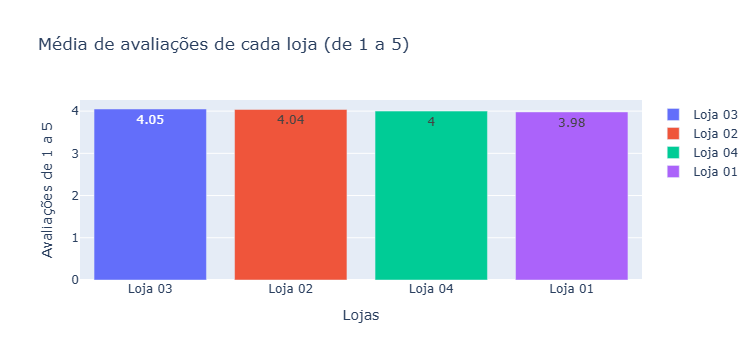

In [45]:
fig = px.bar(medias_avaliacoes,
       x='ID da Loja',
       y='Avaliação da compra',
       color='ID da Loja', 
       title='Média de avaliações de cada loja (de 1 a 5)',
       text='Avaliação da compra'
      )

fig.update_layout(legend_title_text='')
fig.update_yaxes(title_text='Avaliações de 1 a 5')
fig.update_xaxes(title_text='Lojas')

fig.show()

> Pode-se perceber, com essa visualização, que a Loja 3 possui uma maior avaliação, enquanto a Loja 01, responsável pelo maior faturamento dentre todas as lojas do Sr.João, é que possui pior avaliação.

# 4. Produtos Mais e Menos Vendidos}

# 5. Frete Médio por Loja